## LAB 7: Design and Analysis of Algorithms
Name: Rudra Shah <br>
Roll Number: 21BCM054
##### Q7. Implement the Prim’s Algorithm for finding Minimum Spanning Tree (MST) using Greedy Approach.

## Example 2

### Importing Libraries

In [159]:
import pydot
import networkx as nx
import matplotlib.pyplot as plt

In [160]:
vertices = [[1,2],[2,3],[3,4],[4,5],[5,6],[6,1],[5,7],[7,2],[7,4]]
weight = [28,16,12,22,25,10,24,14,18]

### Initial Graph

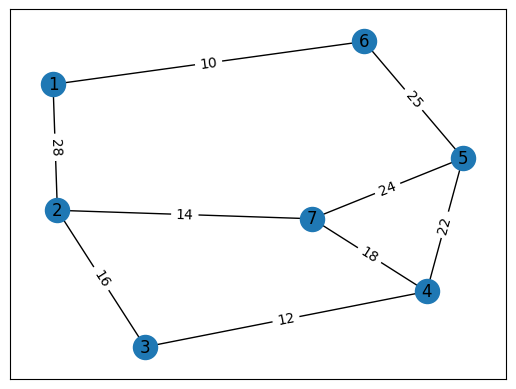

In [161]:
graph = nx.Graph()
for i in range(len(vertices)):
    graph.add_edge(vertices[i][0], vertices[i][1], weight=weight[i])

pos = nx.spring_layout(graph)
nx.draw_networkx(graph, pos)
labels = nx.get_edge_attributes(graph,'weight')
nx.draw_networkx_edge_labels(graph,pos,edge_labels=labels)
plt.show()

### Algorithm

In [162]:
def prims(vertices, weight):
    minev = min(min(vertices))
    maxev = max(max(vertices))
    mstlen = maxev-minev+1

    mst = [minev]
    summst = 0
    mstweight = []
    vis = []

    while(1):
        if(len(mst)==mstlen):
            break
        temp = []
        for i in range(len(vertices)):
            if(mst[-1] in vertices[i]):
                ltemp = vertices[i].copy()
                ltemp.remove(mst[-1])
                ltemp.append(weight[i])
                if(ltemp[0] not in mst):
                    temp.append(ltemp)

        vis+=temp
        minw = min([i[1] for i in vis])
        minv = 0

        vis = sorted(vis, key=lambda x: x[1])

        for i in range(len(vis)):
            if(minw in vis[i]):
                minv = vis[i][0]
                summst+=vis[i][1]
                mstweight.append(vis[i][1])
                break 

        mst.append(minv)
        vis.remove([minv,minw])

    return mst, mstweight, summst

In [163]:
mst, mstweight, summst = prims(vertices, weight)

print("Sequence of MST:",end=" ")
for i in range(len(mst)):
    if(i==len(mst)-1):
        print(mst[i])
    else:
        print(mst[i],end="->")
print("Cost of MST:",summst)

Sequence of MST: 1->6->5->4->3->2->7
Cost of MST: 99


### Spanning Tree Visualization

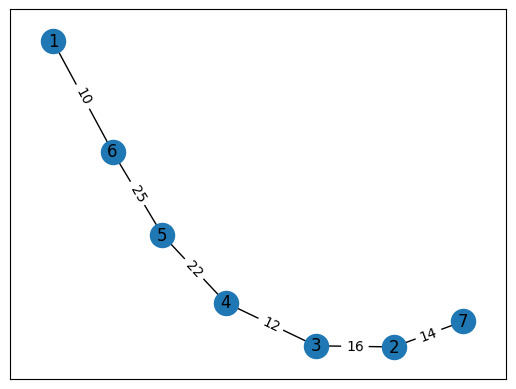

In [164]:
#create spanning tree in networkx
graph = nx.Graph()
for i in range(len(mst)-1):
    graph.add_edge(mst[i], mst[i+1], weight=mstweight[i])

pos = nx.spring_layout(graph)
nx.draw_networkx(graph, pos)
labels = nx.get_edge_attributes(graph,'weight')
nx.draw_networkx_edge_labels(graph,pos,edge_labels=labels)
plt.show()